In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

nb_classes = 10 #On doit reconnaitre 10 chiffres différents


(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
print ('Apprentissage : ', training_images.shape[0])
print ('Test : ', test_images.shape[0])

Apprentissage :  60000
Test :  10000


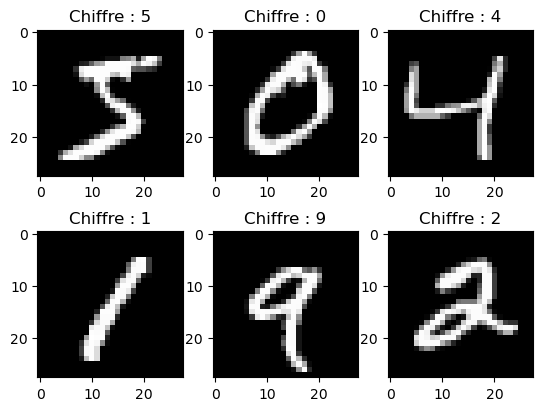

In [2]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(training_images[i], cmap='gray', interpolation='none')
    plt.title("Chiffre : {}".format(training_labels[i]))

In [3]:
training_images = training_images.reshape(60000, 784)
test_images = test_images.reshape(10000, 784)

training_images = training_images.astype('float32')
test_images = test_images.astype('float32')

training_images /= 255
test_images /= 255

training_labels_categories = to_categorical(training_labels, nb_classes)
test_labels_categories = to_categorical(test_labels, nb_classes)


In [6]:
model = Sequential()
model.add(Dense(500, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(0.5), metrics=['accuracy'])

history = model.fit(training_images, training_labels_categories, batch_size=500, epochs=1,
                    verbose=1, validation_data=(test_images, test_labels_categories))
score = model.evaluate(test_images, test_labels_categories, verbose=0)
print('Score sur le dataset de test:', score[1]*100, "%")

120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7742 - loss: 0.7398 - val_accuracy: 0.9345 - val_loss: 0.2334
Score sur le dataset de test: 93.4499979019165 %


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


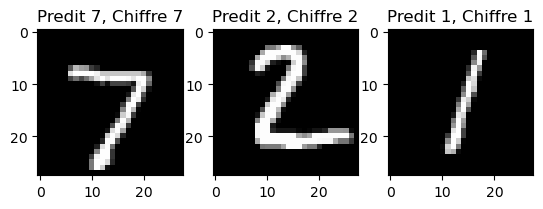

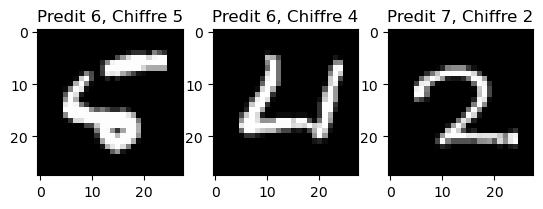

In [11]:
classes_predicted = np.argmax(model.predict(test_images), axis=-1)
correct_indices = np.nonzero(classes_predicted == test_labels)[0]
incorrect_indices = np.nonzero(classes_predicted != test_labels)[0]


plt.figure()
for i, correct in enumerate(correct_indices[:3]):
    plt.subplot(1,3,i+1)
    plt.imshow(test_images[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predit {}, Chiffre {}".format(classes_predicted[correct], test_labels[correct]))

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:3]):
    plt.subplot(1,3,i+1)
    plt.imshow(test_images[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predit {}, Chiffre {}".format(classes_predicted[incorrect], test_labels[incorrect]))